In [22]:
import warnings
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [2]:
suicides_all = pd.read_csv('who_suicide_statistics.csv')
suicides_all.head(5)

country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          NaN    277900.0
1  Albania  1985  female  25-34 years          NaN    246800.0
2  Albania  1985  female  35-54 years          NaN    267500.0
3  Albania  1985  female   5-14 years          NaN    298300.0
4  Albania  1985  female  55-74 years          NaN    138700.0

In [3]:
suicides_all.country.unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [4]:
suicides_all.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982], dtype=int64)

In [5]:
suicides_all.sex.unique()

array(['female', 'male'], dtype=object)

In [6]:
suicides_all.age.unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [7]:
suicides_all.population.unique()

array([277900., 246800., 267500., ...,   7291.,  12615.,   2496.])

In [8]:
unique_suicides_no = np.array(suicides_all.suicides_no.dropna().unique(), dtype=int)
unique_suicides_no[unique_suicides_no == 0]
#there are 0 values, so Nan does not correspond to zero

array([0])

In [9]:
nans_percentage = len(suicides_all[suicides_all.suicides_no.isnull()]) / len(suicides_all) * 100
print('Nan percentage is {:.2f}%'.format(nans_percentage))

Nan percentage is 5.15%


In [10]:
#check in which year nans occur
nan_rows = suicides_all[suicides_all.suicides_no.isnull()]
nan_rows.year.unique()

array([1985, 1986, 1990, 1991, 2011, 2012, 2013, 2014, 2015, 1983, 2004,
       2005, 1979, 2006, 1981, 1982, 2010, 1995, 1980, 1984, 1987, 1988,
       1989, 2002, 2003, 1992, 1993, 2008, 2016, 1994, 1996, 1997, 1998],
      dtype=int64)

In [11]:
suicides_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC56D0C2E8>,
      dtype=object)

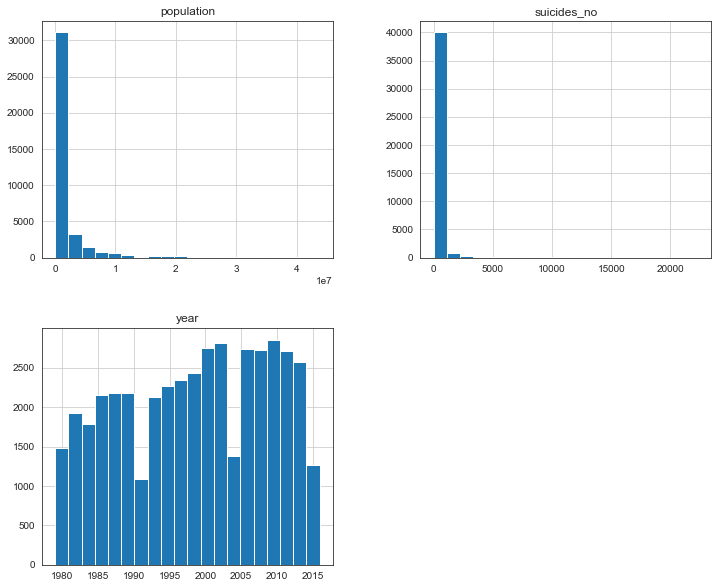

In [23]:
suicides_all.hist(bins=20, figsize=(12,10))

In [13]:
countries = suicides_all.country.unique()
ages = suicides_all.age.unique()

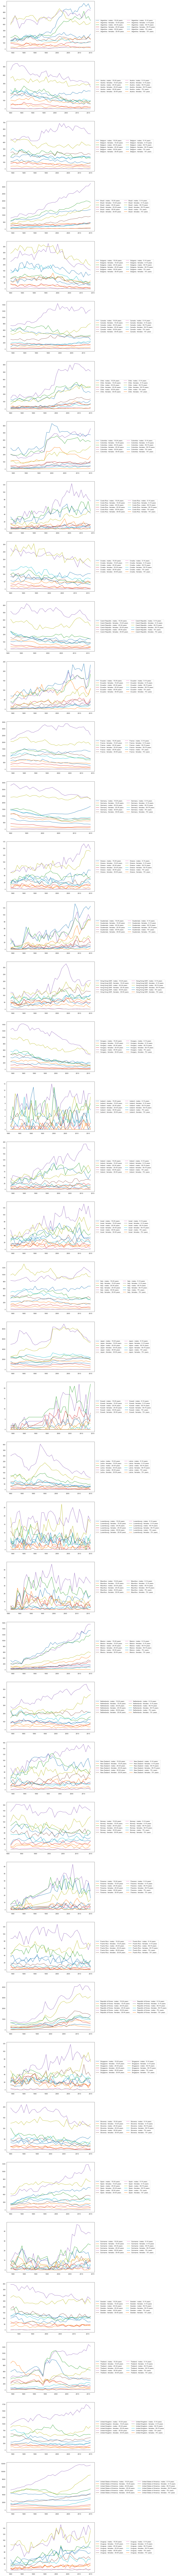

In [24]:
plt.figure(figsize=(10, 300))
for i, country in enumerate(countries):
    ax = plt.subplot(len(countries), 1, i+1)
    for j, age in enumerate(ages):
        #try:
        by_age = suicides_all[(suicides_all.country == country) & (suicides_all.age == age)]
        by_age = by_age.sort_values(by='year')
        male = by_age[by_age.sex == 'male']
        years_male = male.year
        female = by_age[by_age.sex == 'female']
        years_female = female.year
        plt.plot(years_male, male.suicides_no, label=country+' - males - '+age)
        plt.plot(years_female, female.suicides_no, label=country+' - females - '+age)
        #except:
        #    pass
    ax.legend(ncol=2, loc='center left', bbox_to_anchor=(1, 0.5))

In [15]:
for c in countries:
    if any(np.isnan(suicides_all[suicides_all.country == c].population)):
        print(c)

Anguilla
Bermuda
Bolivia
British Virgin Islands
Cayman Islands
Dominica
Dominican Republic
Falkland Islands (Malvinas)
Haiti
Honduras
Iraq
Jordan
Malaysia
Monaco
Montserrat
Morocco
Netherlands Antilles
Nicaragua
Occupied Palestinian Territory
Peru
Rodrigues
Saint Kitts and Nevis
Saint Pierre and Miquelon
San Marino
Saudi Arabia
Syrian Arab Republic
Tajikistan
Tunisia
Turks and Caicos Islands
Zimbabwe


In [16]:
countries = ['Argentina', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
            'Croatia', 'Czech Republic', 'Ecuador',
            'France', 'Germany', 'Greece', 'Guatemala', 'Hong Kong SAR', 'Hungary', 'Iceland',
            'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Latvia', 'Luxembourg', 'Mauritius', 'Mexico',
            'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Puerto Rico',
            'Republic of Korea', 'Singapore', 'Slovenia', 'Spain', 'Suriname', 'Sweden',
            'Thailand', 'United Kingdom', 'United States of America', 'Uruguay']

In [17]:
suicides_dict = {}
for country in countries:
    temp_dict = suicides_all[suicides_all.country == country].groupby(['year']).sum()
    temp_dict = temp_dict[temp_dict.suicides_no != 0]
    suicides_dict[country] = temp_dict

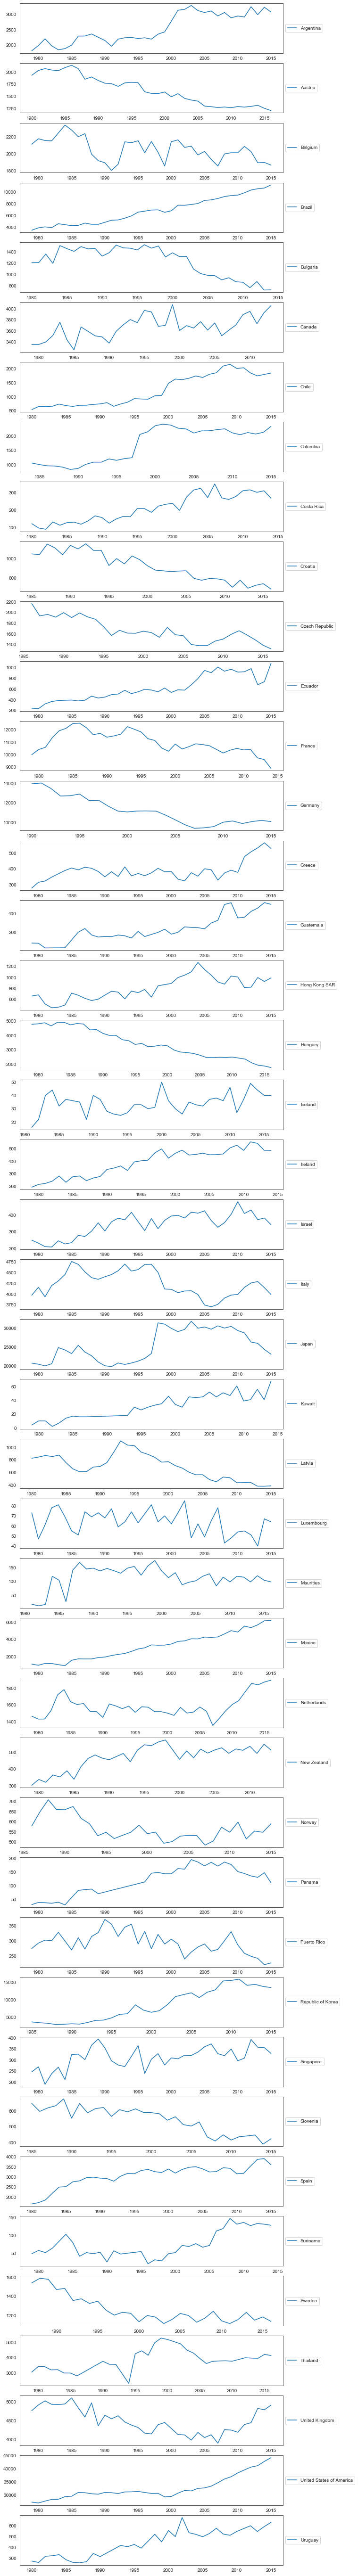

In [25]:
plt.figure(figsize=(10, 100))
for i, country in enumerate(countries):
    ax = plt.subplot(len(countries), 1, i+1)
    plt.plot(suicides_dict[country].index, suicides_dict[country].suicides_no, label=country)
    ax.legend(ncol=2, loc='center left', bbox_to_anchor=(1, 0.5))

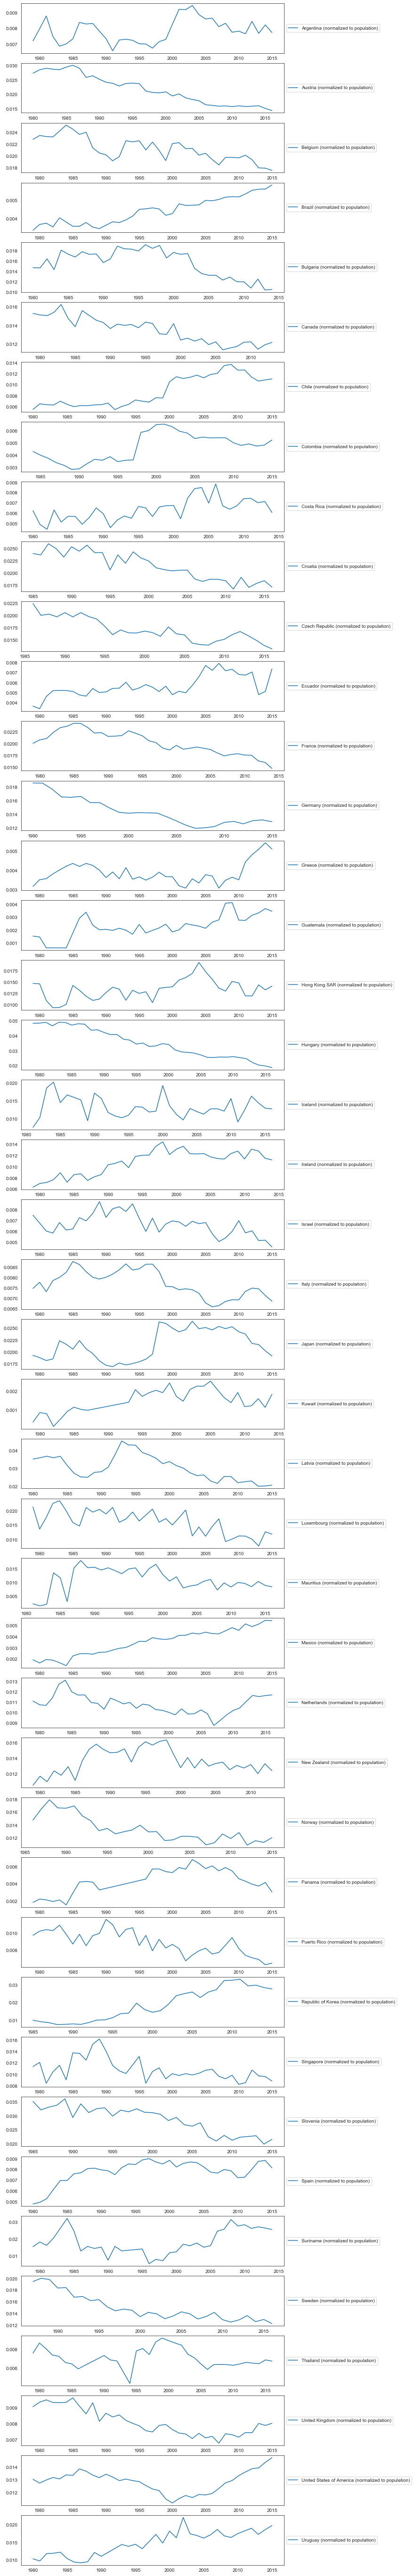

In [26]:
plt.figure(figsize=(10, 100))
for i, country in enumerate(countries):
    ax = plt.subplot(len(countries), 1, i+1)
    plt.plot(suicides_dict[country].index,
             suicides_dict[country].suicides_no/suicides_dict[country].population*100,
             label=country+' (normalized to population)')
    ax.legend(ncol=2, loc='center left', bbox_to_anchor=(1, 0.5))

# ITALY

In [20]:
italy = suicides_dict['Italy']

In [27]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [29]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(italy.suicides_no, order=param, seasonal_order=param_seasonal,
                                            enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:705.9187415560565
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:367.11603900884523
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:380.22227954280544
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:198.87989382139367
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:643.880058123301
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2071.7608222811623
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:331.6591796973456
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:358.67127627326255
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:332.7978467946359
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:186.96019568358074
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:450.78752782367343
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:315.97516559155173
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:308.17939708657786
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:163.95029629621672
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:435.06671127401637
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:301.99505984484176
ARIMA(0, 1, 1)x(1, 0, 0, 12

### ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:147.63905174575987

In [61]:
mod = sm.tsa.statespace.SARIMAX(italy.suicides_no, order=(1, 0, 1), seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8832      0.165      5.365      0.000       0.561       1.206
ma.L1          1.0000      0.486      2.057      0.040       0.047       1.953
ar.S.L12      -0.7746      0.162     -4.782      0.000      -1.092      -0.457
sigma2      1.438e+04   3.38e-05   4.25e+08      0.000    1.44e+04    1.44e+04


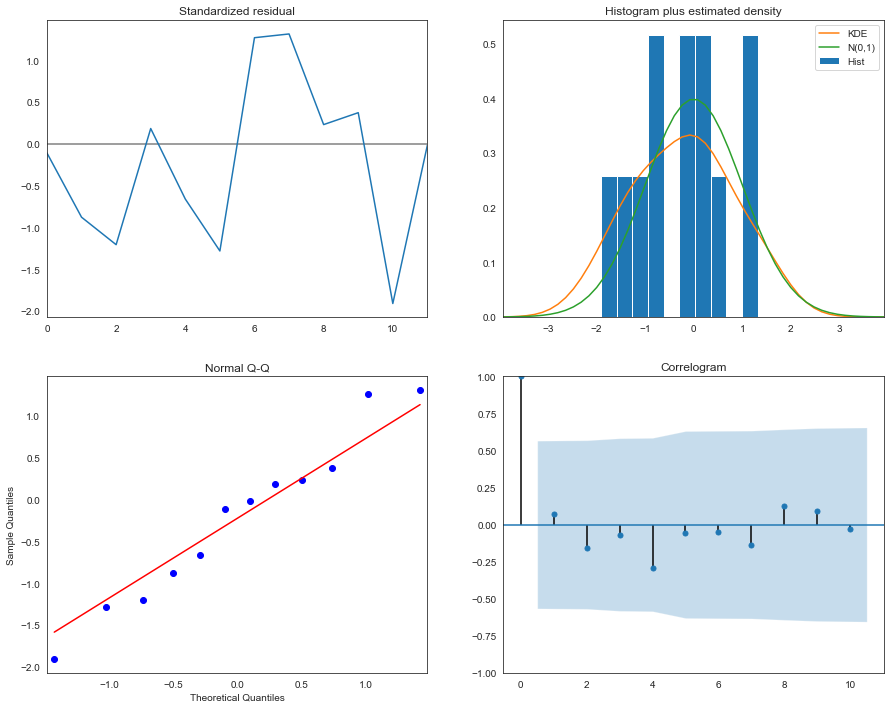

In [62]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [69]:
pred = []
pred_ci = []
for i in range(2011, 2021):
    pred.append(results.get_prediction(start=i, dynamic=False)
    pred_ci.append([pred.conf_int().iloc[:, 0], pred.conf_int().iloc[:, 0]])

SyntaxError: invalid syntax (<ipython-input-69-7abec53ed831>, line 5)

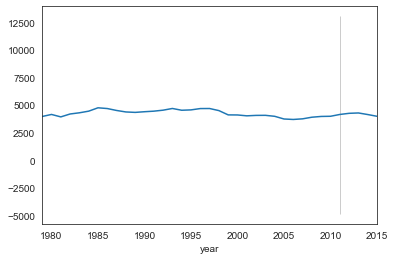

In [65]:
ax = italy.suicides_no.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

In [72]:
pred.conf_int().iloc[:,0]

AttributeError: 'Series' object has no attribute 'value'